In [1]:
import logging
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

train_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_input.npy')
train_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_target.npy')
dev_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_input.npy')
dev_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_target.npy')
test_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_input.npy')
test_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_target.npy')



print("Training X shape: " + str(train_X.shape))
print("Training Y shape: " + str(train_Y.shape))
print("Dev X shape: " + str(dev_X.shape))
print("Dev Y shape: " + str(dev_Y.shape))
print("Test X shape: " + str(test_X.shape))
print("Test Y shape: " + str(test_Y.shape))

Mounted at /content/drive
Training X shape: (420, 128, 33)
Training Y shape: (420, 8)
Dev X shape: (120, 128, 33)
Dev Y shape: (120, 8)
Test X shape: (60, 128, 33)
Test Y shape: (60, 8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 729 images belonging to 10 classes.
Found 244 images belonging to 10 classes.
(1, 299, 299, 3)


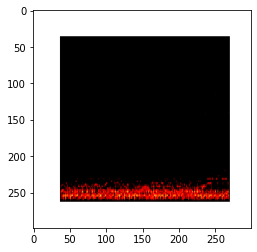

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


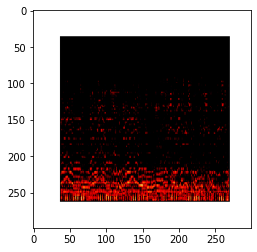

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


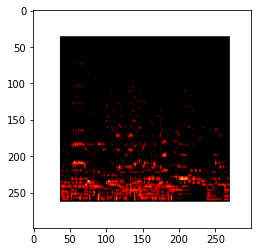

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


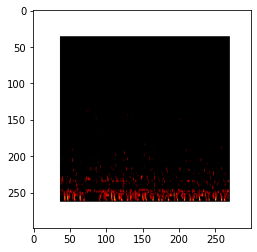

(1, 299, 299, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


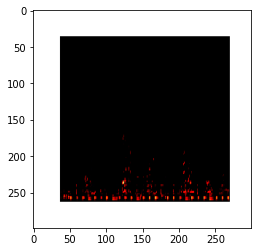

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


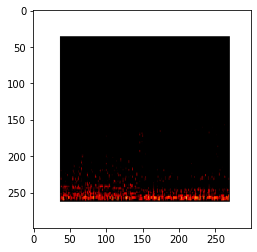

(1, 299, 299, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


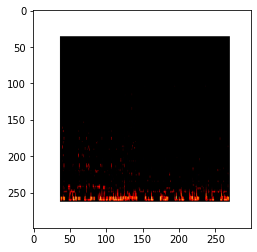

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


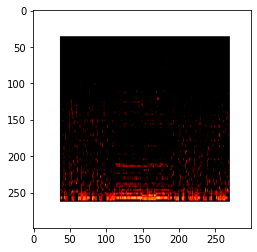

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 299, 299, 3)


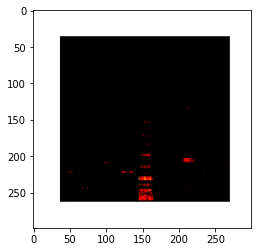

(1, 299, 299, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


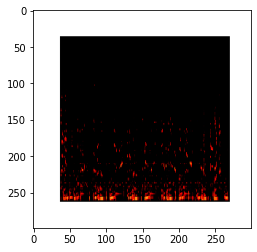

In [25]:
!rm -rf train/.ipynb_checkpoints
!rm -rf val/.ipynb_checkpoints


WORKING_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL'
TRAIN_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL/images_original'
VAL_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL/val'


from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 1

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=0,
    zoom_range=[1,1],
    horizontal_flip=False,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=0,
    zoom_range=[1,1],
    horizontal_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

for i in range(10):
  img, label = train_generator.next()
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[0])
  plt.show()

In [57]:
# CREATE MODEL & COMPILE
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD

input_shape = (train_X.shape[1], train_X.shape[2])

net = Sequential()
net.add(Conv2D(8, (3, 3), padding='same', input_shape=(299, 299, 3)))
net.add(BatchNormalization())
net.add(Activation('relu'))

#net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(16, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

#net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(32, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Conv2D(24, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Conv2D(8, (2, 2), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Flatten())
net.add(Dense(10, activation='softmax'))

net = Sequential()
net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 3)))
net.add(MaxPooling2D((2, 2)))
net.add(Dropout(0.2))
net.add(Conv2D(64, (3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))
net.add(Dropout(0.2))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))
net.add(Dropout(0.2))
net.add(Conv2D(16, (3, 3), activation='relu'))
net.add(Flatten())
net.add(Dense(64, activation='relu'))
net.add(Dropout(0.2))
net.add(Dense(24, activation='relu'))
net.add(Dense(10, activation='softmax'))



# Hyperparameters
lr = 0.01
mom = 0.9 
ep = 10
bs = 100

# compile the keras model
opt = SGD(learning_rate=lr, momentum=mom)
#net.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#net.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
net.summary()

#input_shape = (train_X.shape[1], train_X.shape[2])
#print("Build LSTM RNN model ...")
#model = Sequential()

#model.add(LSTM(units=128, dropout=0.00, recurrent_dropout=0.0, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
#model.add(Dense(units=train_Y.shape[1], activation="softmax"))

#opt = Adam()
#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_147 (Conv2D)         (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 148, 148, 32)      0         
                                                                 
 conv2d_148 (Conv2D)         (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 73, 73, 64)      

In [58]:
# TRAINING MODEL

EPOCHS = 50
STEPS_PER_EPOCH = 25
VALIDATION_STEPS = 15

#history = net.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val,y_val), verbose=1)
history = net.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)


#batch_size = 35  # num of training examples per minibatch
#num_epochs = 400
#model.fit(
#    train_X,
#    train_Y,
#    batch_size=batch_size,
#    epochs=num_epochs,
#)

Epoch 1/50
25/25 [==============================] - 6s 226ms/step - loss: 2.3957 - accuracy: 0.2000 - val_loss: 2.3062 - val_accuracy: 0.0667
Epoch 2/50
25/25 [==============================] - 5s 207ms/step - loss: 2.3224 - accuracy: 0.1600 - val_loss: 2.3019 - val_accuracy: 0.1333
Epoch 3/50
25/25 [==============================] - 5s 208ms/step - loss: 2.3117 - accuracy: 0.1600 - val_loss: 2.3132 - val_accuracy: 0.0667
Epoch 4/50
25/25 [==============================] - 5s 206ms/step - loss: 2.3266 - accuracy: 0.0800 - val_loss: 2.3138 - val_accuracy: 0.0667
Epoch 5/50
25/25 [==============================] - 5s 208ms/step - loss: 2.3067 - accuracy: 0.0800 - val_loss: 2.3511 - val_accuracy: 0.0000e+00
Epoch 6/50
25/25 [==============================] - 5s 206ms/step - loss: 2.3895 - accuracy: 0.2800 - val_loss: 2.2982 - val_accuracy: 0.1333
Epoch 7/50
25/25 [==============================] - 5s 207ms/step - loss: 2.2965 - accuracy: 0.2000 - val_loss: 2.3096 - val_accuracy: 0.0667
Ep

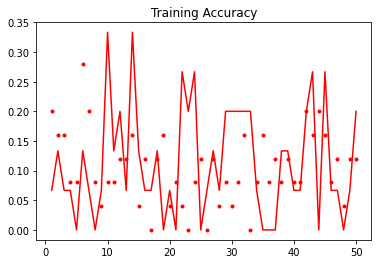

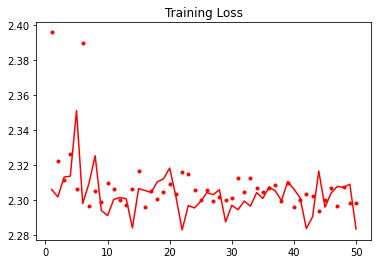

In [59]:
# Validation & Testing
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc,'r')
plt.plot(epochs, acc,'r.')
plt.title("Training Accuracy")

plt.figure()
plt.plot(epochs, val_loss,'r')
plt.plot(epochs,loss,'r.')
plt.title("Training Loss")
plt.show()

In [46]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')
  plt.show()



In [11]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

NameError: ignored

In [ ]:
# Validation & Testing
score, accuracy = model.evaluate(
    dev_X, dev_Y, batch_size=batch_size, verbose=1
)
print("Validation loss:  ", score)
print("Validation accuracy:  ", accuracy)

score, accuracy = model.evaluate(
    test_X, test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)

4/4 [==============================] - 1s 79ms/step - loss: 1.4762 - accuracy: 0.6083
Validation loss:   1.4762179851531982
Validation accuracy:   0.6083333492279053
2/2 [==============================] - 0s 81ms/step - loss: 1.4194 - accuracy: 0.6500
Test loss:   1.4193580150604248
Test accuracy:   0.6499999761581421


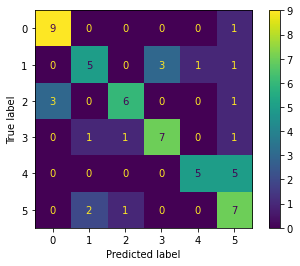

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(test_X)
matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()


In [ ]:
# Creates a HDF5 file 'lstm_genre_classifier.h5'
model_filename = "/content/drive/Shared drives/CS 539 Project/goodClassifier.h5"
print("\nSaving model: " + model_filename)
model.save(model_filename)
# Creates a json file
model_json = model.to_json()
f = open("/content/drive/Shared drives/CS 539 Project/goodClassifier.json", "w")
f.write(model_json)
f.close()



Saving model: /content/drive/Shared drives/CS 539 Project/goodClassifier.h5
